# THE SPARK FOUNDATION - Data Science and Business Analytics Internship

# Task 1 - Prediction Using Supervised Machine Learning

In this task we have to predict the percentage of an student based on the no. of study hours, also predict score if a student studies for 9.25 hrs/day?

Author- Uttam Kumar Sahoo

In [1]:
#IMPORTING THE MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")

# READING THE DATASET

In [3]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

Printing the data

In [5]:
print(data.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


In [8]:
print("The shape of the Dataset", data.shape)

The shape of the Dataset (25, 2)


In [9]:
#checking the dataset wheteher there is any null values or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#description of the data
data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [11]:
#getting the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Lets Plot our dataset in 2-D graph

<function matplotlib.pyplot.show(close=None, block=None)>

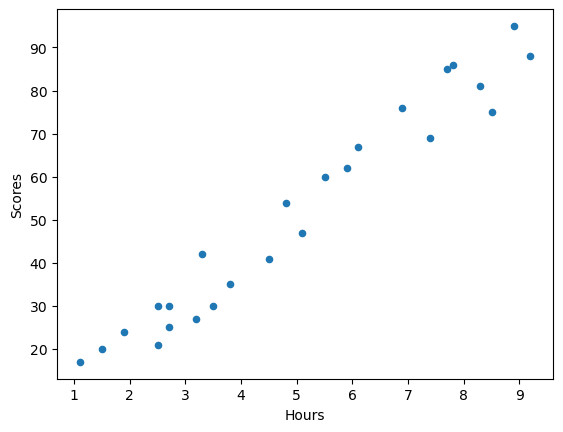

In [12]:
data.plot(kind='scatter', x='Hours', y='Scores')
plt.show

In [13]:
data.corr(method = 'pearson')

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

In [14]:
data.corr(method = 'spearman')

Hours    Scores
Hours   1.000000  0.971891
Scores  0.971891  1.000000

In [15]:
hours = data['Hours']
scores = data['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

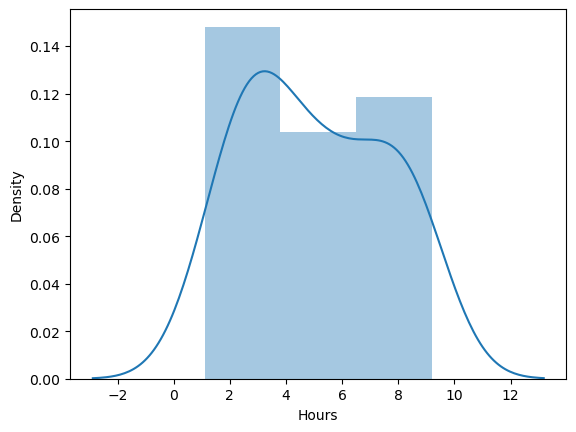

In [16]:
sns.distplot(hours)

# Using Linear Regression

In [17]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

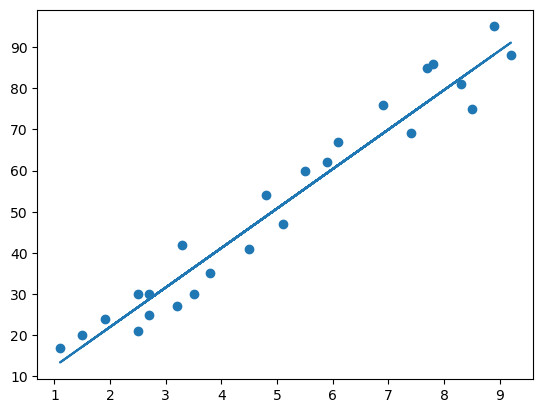

In [20]:
m=reg.coef_
c=reg.intercept_
line = m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [21]:
y_pred = reg.predict(x_test)

In [22]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

Target  Predicted
0      95  88.211394
1      30  28.718453
2      76  69.020122
3      35  39.273652
4      17  13.365436

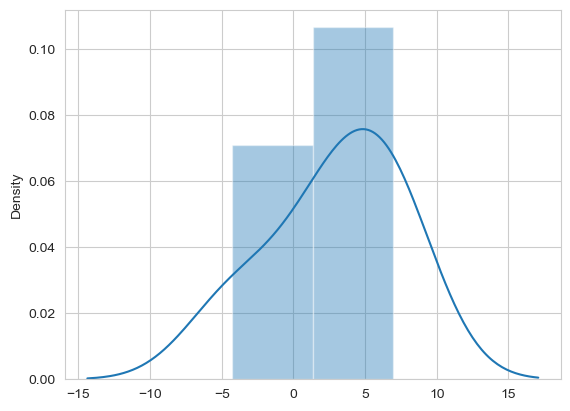

In [23]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [24]:
h = 9.25
s = reg.predict([[h]])
print("IF THE STUDENT STUDIES FOR {} HOURS PER DAY HE/SHE WILL SCORE {}%.".format(h,s))

IF THE STUDENT STUDIES FOR 9.25 HOURS PER DAY HE/SHE WILL SCORE [91.56986604]%.


In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score 0.971014141329942
